<a href="https://colab.research.google.com/github/chrisMper/BIS/blob/main/BIS_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Assignment: Data Analytics Process and Interpretation***

20020759

## 1. Select a Business Domain & Dataset:

### Business Domain:
Customer Behavior in Retail (Starbucks)

### Dataset:
Starbucks Customer Survey
Survey from Malaysia on Starbucks Customer Behaviour

### Dataset Description:
The dataset contains survey responses from over 100 respondents about their buying behavior at Starbucks in Malaysia. It includes demographic information (gender, age range, employment status, income range) and customer behavior data.

The coloumn data are given as below in numerical values.

1. Id
*   Numerical
2. gender
*   0 - Male
*   1 - Female
3. age
*   1 - From 20 to 29
*   2 - From 30 to 39
*   3 - 40 and above
4. status
*   0 - Student
*   1 - Self-Employed
*   2 - Employed
*   3 - Housewife
5. income
* 0 - Less than RM25,000
* 1 - RM25,000 – RM50,000
* 2 - RM50,000 – RM100,000
* 3 - RM100,000 – RM150,000
* 4 - More than RM150,000
6. visitNo
* 0 - Daily
* 1 - Weekly
* 3 - Monthly
* 4 - Never
7. method
* 0 - Dine In
* 1 - Drive-thru
* 2 - Take away
* 3 - Never
* 4 - Others
8. timeSpend
* 0 - Below 30 mins
* 1 - 30 mins to 1h
* 2 - 1h to 2h
* 3 - 2h to 3 h
* 4 - More than 3h
9. location
* 0 - Within 1km
* 1 - 1km to 3km
* 2 - More than 3km
10. membershipCard
* 0 - Yes
* 1 - No

## 2. Define an Analytical Scenario & Process

### Business Question:
What are the characteristics of customers who are likely to continue buying from Starbucks?

### Analytical Process:



1.   Data Collection: Download the dataset from Kaggle and load the dataset
2.   Data Preprocessing: Handle missing values, encode categorical variables, and clean the data.
3. Exploratory Data Analysis (EDA): Analyze the dataset using summary statistics and visualizations to understand customer demographics and behavior.
4. Statistical Analysis: Perform correlation analysis, regression, or clustering to identify key factors influencing customer retention.
5. Interpretation: Interpret the results and provide actionable insights for Starbucks to retain customers.
6. Visualization: Use Python libraries (Matplotlib, Seaborn, Plotly) to visualize key findings.





## 3. Perform the Analysis Using Python

### 1. Data Collection

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv('Starbucks satisfactory survey encode cleaned.csv')

# Display the first few rows
print(df.head())

Saving Starbucks satisfactory survey encode cleaned.csv to Starbucks satisfactory survey encode cleaned (3).csv
   Id  gender  age  status  income  visitNo  method  timeSpend  location  \
0   1       1    1       0       0        3       0          1         0   
1   2       1    1       0       0        3       2          0         1   
2   3       0    1       2       0        2       0          1         2   
3   4       1    1       0       0        3       2          0         2   
4   5       0    1       0       0        2       2          1         1   

   membershipCard  ...  chooseRate  promoMethodApp  promoMethodSoc  \
0               0  ...           3               1               1   
1               0  ...           2               1               1   
2               0  ...           3               1               1   
3               1  ...           3               1               1   
4               1  ...           3               1               1   

   promoMe

### 2. Data Preprosessing

In [ ]:
# Data Preprocessing

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

df = df.ffill()  # Replace with forward fill


Missing values in each column:
Id                        0
gender                    0
age                       0
status                    0
income                    0
visitNo                   0
method                    0
timeSpend                 0
location                  0
membershipCard            0
itemPurchaseCoffee        0
itempurchaseCold          0
itemPurchasePastries      0
itemPurchaseJuices        0
itemPurchaseSandwiches    0
itemPurchaseOthers        0
spendPurchase             0
productRate               0
priceRate                 0
promoRate                 0
ambianceRate              0
wifiRate                  0
serviceRate               0
chooseRate                0
promoMethodApp            0
promoMethodSoc            0
promoMethodEmail          0
promoMethodDeal           0
promoMethodFriend         0
promoMethodDisplay        0
promoMethodBillboard      0
promoMethodOthers         0
loyal                     0
dtype: int64


### 3. Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())



Summary Statistics:
               Id      gender         age      status      income     visitNo  \
count  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000   
mean    60.150442    0.522124    1.185841    1.221239    0.761062    2.557522   
std     35.566392    0.501735    0.675445    0.932877    1.087874    0.718854   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     29.000000    0.000000    1.000000    0.000000    0.000000    2.000000   
50%     60.000000    1.000000    1.000000    2.000000    0.000000    3.000000   
75%     90.000000    1.000000    1.000000    2.000000    1.000000    3.000000   
max    122.000000    1.000000    3.000000    3.000000    4.000000    3.000000   

           method   timeSpend    location  membershipCard  ...  chooseRate  \
count  113.000000  113.000000  113.000000      113.000000  ...  113.000000   
mean     1.070796    0.610619    1.274336        0.469027  ...    3.539823   
std      0.97940

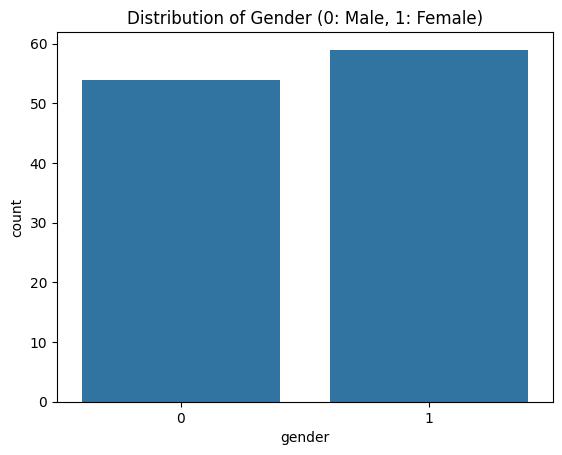

In [ ]:
# Distribution of gender
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender (0: Male, 1: Female)')
plt.show()

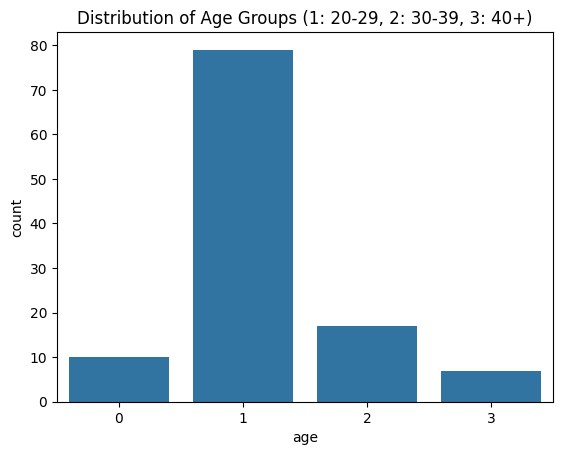

In [ ]:
# Distribution of age groups
sns.countplot(x='age', data=df)
plt.title('Distribution of Age Groups (1: 20-29, 2: 30-39, 3: 40+)')
plt.show()

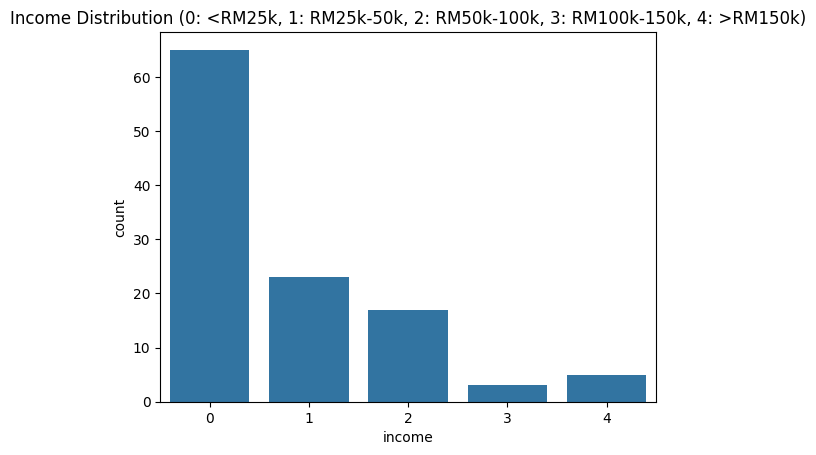

In [ ]:
# Distribution of income ranges
sns.countplot(x='income', data=df)
plt.title('Income Distribution (0: <RM25k, 1: RM25k-50k, 2: RM50k-100k, 3: RM100k-150k, 4: >RM150k)')
plt.show()

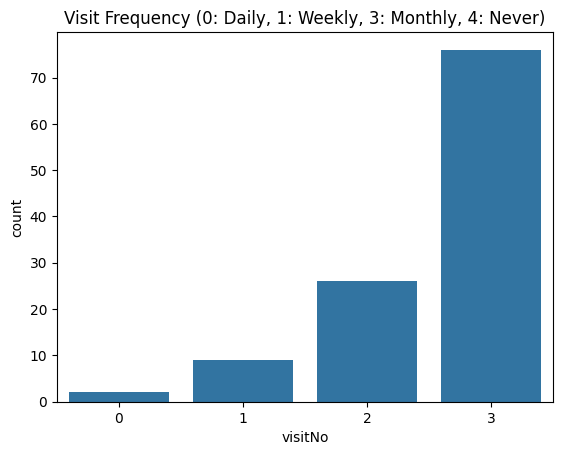

In [ ]:
# Distribution of visit frequency
sns.countplot(x='visitNo', data=df)
plt.title('Visit Frequency (0: Daily, 1: Weekly, 3: Monthly, 4: Never)')
plt.show()

### 4. Statistical Analysis

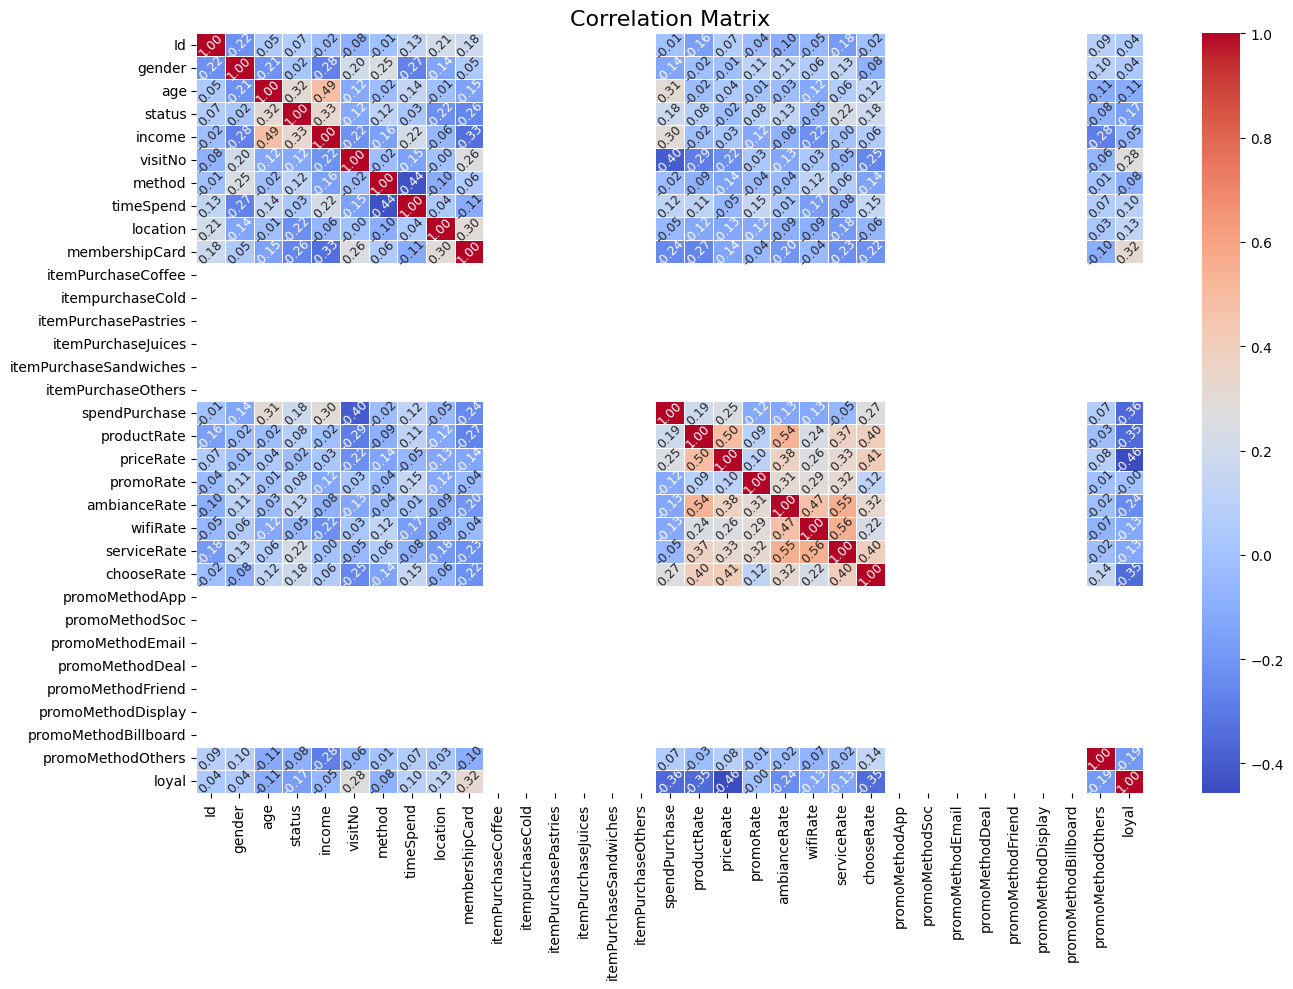

In [ ]:
plt.figure(figsize=(14, 10))

corr_matrix = df.corr()

# heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'size': 9, 'rotation': 45},
    linewidths=0.5
)

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         9
           1       1.00      0.36      0.53        14

    accuracy                           0.61        23
   macro avg       0.75      0.68      0.60        23
weighted avg       0.80      0.61      0.58        23

Accuracy: 0.6086956521739131


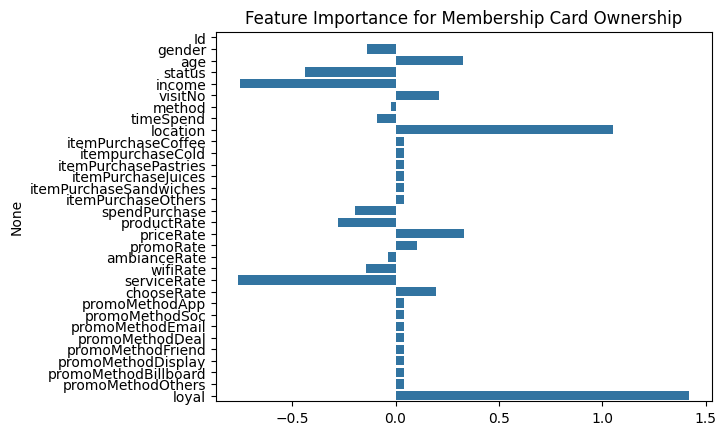

In [ ]:

# Prediction whether a customer has a membership card based on their behavior.
X = df.drop('membershipCard', axis=1)
y = df['membershipCard']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression to predict membership card ownership
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance from logistic regression
importance = model.coef_[0]
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance for Membership Card Ownership')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         3
           3       0.80      0.89      0.84        18

    accuracy                           0.74        23
   macro avg       0.38      0.41      0.39        23
weighted avg       0.67      0.74      0.70        23

Accuracy: 0.7391304347826086


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


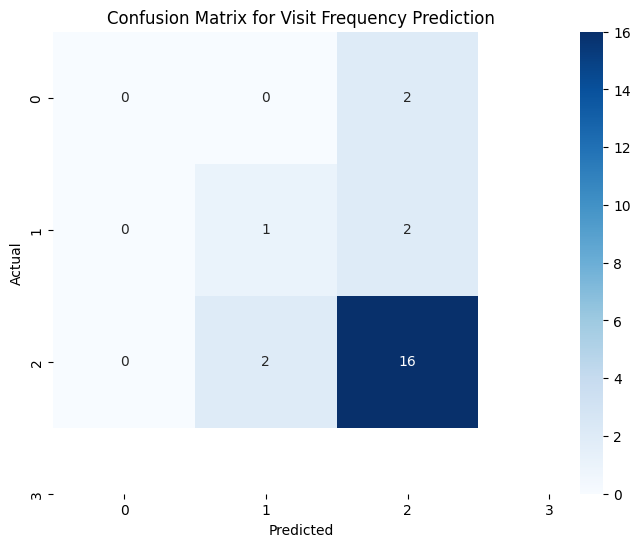

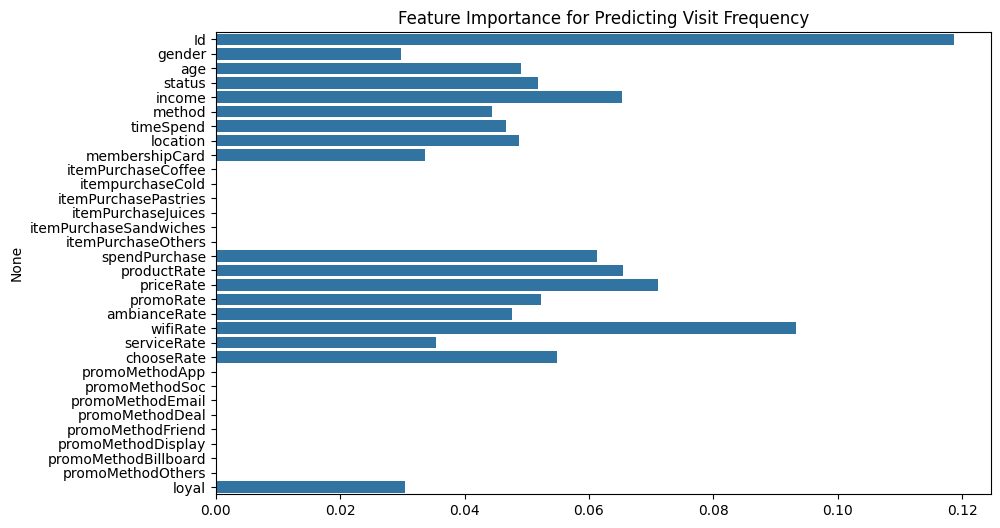

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop('visitNo', axis=1)
y = df['visitNo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier to predict visit frequency
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Visit Frequency Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance from Random Forest
importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance for Predicting Visit Frequency')
plt.show()

## 4. Interpretation

The following characteristics define customers who are likely to continue purchasing from Starbucks:


###   Loyalty & Engagement

1.   Loyalty is the strongest predictor of visit frequency.

*   Customers with high loyalty scores are much more likely to continue buying from Starbucks.


2.   Membership Card Ownership is an important factor.

*   Customers who own a Starbucks membership card visit more frequently, indicating that rewards and exclusive perks influence repeat purchases.

### In-Store Experience & Amenities
1.   WiFi Rate is highly significant.

*   Customers who rate Starbucks WiFi highly tend to visit frequently, meaning that offering reliable internet can retain regular customers, especially those who work or study at Starbucks.

2.   Service Rate and Choose Rate also impact visit frequency.

*   A positive experience with customer service and the ability to easily select products increase the likelihood of return visits. Friendly baristas, fast service, and customization options matter.


### Location & Convenience

1.   Location plays a significant role.

*   Customers who live or work near Starbucks are more likely to continue purchasing.

### Promotional Influence

1.   Traditional promotions (email, social media, billboards) have low importance in predicting repeat visits.

*   This suggests that loyalty-driven and in-store experiences matter more than broad marketing campaigns.


















### Based on these insights, Starbucks can improve customer retention by:



1. Strengthening the Loyalty Program – Offering personalized rewards, tiered membership benefits, and exclusive perks to keep customers engaged
2. Enhancing In-Store Amenities – Providing high-speed WiFi, comfortable seating, and a welcoming ambiance to encourage longer stays and repeat visits.
3. Improving Customer Service – Investing in barista training, mobile ordering efficiency, and customer experience personalization to maintain service quality.
4. Targeting High-Value Customers – Using purchase data to identify frequent buyers and offering exclusive promotions tailored to their preferences.
5. Optimizing Store Locations – Expanding in high-traffic areas and ensuring easy access for regular customers.





